<a href="https://colab.research.google.com/github/IANovoselov/well/blob/main/well.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import numpy as np
import pandas as pd

In [109]:
# Исходные данные для моделировния

# Фонтанирующая скважина
# p_R = 28  # Среднепластовое давление
# p_G0 = 25  # Давление насыщенного газа

# Нефонтанирующая скважина
p_R = 21.65  # Среднепластовое давление
p_G0 = 17.32  # Давление насыщенного газа

H_R = 3000  # Глубина забоя по вертикали
w_1 = 12  # Гидропроводность из пласта в ПЗ скважины
w_2 = 60  # Гидропроводность из ПЗ в забой
betta = 0.3  # Объёмная доля воды
p_0 = 0.1  # Атмосферное давление

# Удельный вес
gamma_oil = 0.0068  # нефти
gamma_water = 0.011  # воды
gamma_gas = 0.000008  # газа
G = 100  # Газовый фактор
p_L = 1.5  # Давление в линии нефтесбора

# Гидросопротивление
r_K = 0.2  # обсадной колонный
r_N = 1.6  # НКТ
r_T = 0.8  # затрубного пространства
r_U = 2  # устьевого штуцера
r_GU = 3  # перепускного клапана

# Параметры насоса
H_N = 2000  # уровень подвеса
h_0 = 2000  # номинальный напор
q_0 = 93  # номинальный дебит

# Напорная характеристика
q_Pump = [7/3, 4/3, 2/3]
lambda_0 = [10/3, 2, 3/2]
lambda_1 = [2, 1, 1/4]
lambda_2 = [0.1, 0.88, 0.7]
lambda_3 = [0.72, 0.18, 0.36]

In [110]:
# Моделируемые данные, начальные условия
_q_N = []
_q_T = []
__q = []
_p_1 = []
_p_2 = []
_p_3 = []
_p_5 = []
_p_4 = []
_p_8 = []
_u = []
_h_4 = []

In [111]:

# # Начальное состояние насоса
# u = 0
# w = 0

# num = 1
# Q_sum = 0
# q = 0

# Q_H = 45000
# Q_K = 120000
# v_R = 0.7
# k_G = 10

# p_R_0 = p_R

# iterations_num = 5000

# for k in range(iterations_num):

#     Q_sum += q

#     if (Q_sum-Q_H)>0 and (Q_sum-Q_K)>0:
#         betta = (1/(Q_K-Q_H))*((Q_sum-Q_H)-(Q_sum-Q_K))
#     elif (Q_sum-Q_H)>0 and (Q_sum-Q_K)<=0:
#         betta = (1/(Q_K-Q_H))*((Q_sum-Q_H))
#     else:
#         betta = (1/(Q_K-Q_H))

#     p_R = p_R_0*(1-v_R*betta)

#     gamma = (1-betta)*gamma_oil+betta*gamma_water
#     Y_G = (1-betta)*gamma_gas*G

#     r12=r_K+((1/w_1)/gamma)
#     r21=r12
#     r11=r12+r_N+r_U
#     r22=r12+r_T+r_GU

#     dH_R =  (p_R-p_L)/gamma - H_R
#     gh_1 = u*w*w*h_0*lambda_0[num]+dH_R
#     gh_2 = dH_R

#     R = np.array([[u*w*(h_0/q_0)*lambda_1[num]+r11, r12],
#                   [r12+(Y_G/gamma)*r_GU*u*w*k_G, r22]])

#     Q = np.linalg.inv(R).dot(np.array([[1], [1]]))

#     if dH_R > 0:
#         q_N_porog = dH_R/(r12+u*w*(Y_G/gamma)*r_GU*k_G)

#         a = h_0*lambda_0[2]
#         b = (h_0/q_0)*lambda_1[2]*q_N_porog
#         c = r11*q_N_porog - dH_R

#         w_porog = (b + np.sqrt(b*b-4*a*c))/(2*a)

#         if u*w > 0:
#             if w <= w_porog:
#                 H_4 = 0
#                 H_8 = 0
#                 Q = np.linalg.inv(R).dot(np.array([[gh_1], [gh_2]]))
#                 q_N = Q[0, 0]
#                 q_T = Q[1, 0]
#             else:
#                 q_T = 0
#                 H_8 = 0
#                 if (gh_1/(u*w*(h_0/q_0)*lambda_1[num]+r11)) > 0 :
#                     q_N = gh_1/(u*w*(h_0/q_0)*lambda_1[num]+r11)
#                 else:
#                     q_N = 0

#             if (((((r_GU*Y_G*k_G+r_R)/gamma)+r_K)*q_N)-dH_R) > 0:
#                 H_4 = ((((r_GU*Y_G*k_G+r_R)/gamma)+r_K)*q_N)-dH_R
#             else:
#                 H_4 = 0
#         else:
#             H_4 = 0
#             H_8 = 0
#             Q = np.linalg.inv(R).dot(np.array([[gh_1], [gh_2]]))
#             q_N = Q[0, 0]
#             q_T = Q[1, 0]


#     else:
#         w_0 = np.sqrt(-dH_R/(h_0*lambda_0[2]))
#         if u*w > 0:
#             if w < w_0:
#                 H_4 = -dH_R
#                 H_8 = -dH_R - w*w*h_0*lambda_0[2]
#                 q_N = 0
#                 q_T = 0

#             else:
#                 q_T = 0
#                 H_8 = 0
#                 if (gh_1/(u*w*(h_0/q_0)*lambda_1[num]+r11)) > 0:
#                     q_N = gh_1/(u*w*(h_0/q_0)*lambda_1[num]+r11)
#                 else:
#                     q_N = 0

#                 if ((((r_GU*Y_G*k_G)/gamma)*q_N)-dH_R) > 0:
#                     H_4 = ((((r_GU*Y_G*k_G+r_R)/gamma)+r_K)*q_N)-dH_R
#                 else:
#                     H_4 = 0


#         else:
#             H_4 = -dH_R
#             H_8 = -dH_R
#             q_N = 0
#             q_T = 0

#     q = q_N + q_T
#     if q >= w*q_0*q_Pump[1] and q <= w*q_0*q_Pump[0]:
#         num = 0
#     elif q > w*q_0*q_Pump[2] and q < w*q_0*q_Pump[1]:
#         num = 1
#     else:
#         num = 2

#     p_1 = p_R - r_R*(q_N+q_T)
#     p_3 = p_1 - gamma*(H_R-H_N+r_K*(q_N+q_T))
#     p_5 = p_L + gamma * H_N + gamma*(r_N+r_U)*q_N
#     p_4 = p_L + r_GU*(Y_G*u*k_G*q_N+gamma*q_T)
#     p_8 = p_L + gamma*r_U*q_N

#     _q_N.append(q_N)
#     _q_T.append(q_T)
#     _p_3.append(p_3)

#     if k == 1500:
#       u = 1
#       w = 1

#     _u.append(u)

# df = pd.DataFrame({'q_N': _q_N, 'q_T': _q_T, 'p_3': _p_3, 'u': _u})

# from matplotlib import pyplot as plt
# df['q_N'].plot(kind='line', figsize=(8, 4), title='q_N', grid=True)
# plt.gca().spines[['top', 'right']].set_visible(False)

In [112]:
# Статический расчёт скважины

# Гидросопротивления
r_1 = 1/w_1  # Пласт - ПЗ
r_2 = 1/w_2  # ПЗ - забой
r_R = r_1 + r_2
r_R

0.09999999999999999

In [113]:
# Давление на забое скважины
p_1 = p_R - r_R*q_0
p_1

12.35

In [114]:
# Давление на приёме насоса
gamma = (1-betta)*gamma_oil+betta*gamma_water  # Удельный вес жидкости
p_3 = p_1 - gamma*(H_R-H_N+r_K*q_0)
p_3

4.140084

In [115]:
# Ограничения
h_lim = 100  # По уровню над приёмом насос
betta_G_lim = 0.25  # По газу у первой ступени

In [116]:
# Высота столба жидкости

dH_R =  (p_R-p_L)/gamma - H_R
dH_R

-500.0

In [117]:
alpha_G_3 = 0.4
alpha_betta = 0.333
k_S = 0.7
X_G = 0.00008

M_R3 = (1-betta)*G*((alpha_G_3*p_0) / (p_G0 - p_0))
p_G3 = p_G0 * (((1-k_S)*M_R3)/(((1-k_S)*M_R3)+alpha_betta))

a_GU = k_S*X_G*M_R3

In [118]:
q_0 = 0.8*(p_R - p_G3 - gamma*(H_R-H_N)) / (r_R + gamma*r_K)
q_0

89.5721425486047

In [119]:
h_0 =q_0*(r_U + r_N + r_K + r_R/gamma) - dH_R
h_0

1951.691046754235

In [120]:
# Расчёт динамики

# Начальные условия
epsilon = 0.02 * q_0
M_q = 0.5

h_4 = H_N + dH_R
p_2 = p_R
t = 0
w = 1
q = 0

# Сегмент напорной характеристики
i = 1

In [121]:
# Начало расчёта
for k in range(15000):

    p_3 = p_L + p_G0 * r_GU * np.sqrt(w) * a_GU * q + gamma * h_4
    p_3 = p_3 / (1 + r_GU * np.sqrt(w) * a_GU* q)

    _q = (p_2 - p_3 - gamma*(H_R-H_N)) / (r_1 + gamma * r_K)

    # Балансировка притока по начальным условиям
    while abs(_q - q) > epsilon:
      q = (1 - M_q)*q + M_q *_q

      p_3 = p_L + p_G0 * r_GU * np.sqrt(w) * a_GU * q + gamma * h_4
      p_3 = p_3 / (1 + r_GU * np.sqrt(w) * a_GU* q)

      _q = (p_2 - p_3 - gamma*(H_R-H_N)) / (r_1 + gamma * r_K)

    q = _q

    # Расчёт подачи

    q_N = (w*w*h_0*lambda_0[i] - H_N + (1/gamma)*(p_3 - p_L)) / (w*(h_0/q_0)*lambda_1[i]+r_U+r_N)
    q_N = max(q_N, 0)

    while q_N > w*q_0*q_Pump[i]:
        i-=1
        i = max(i, 0)
        q_N = (w*w*h_0*lambda_0[i] - H_N + (1/gamma)*(p_3 - p_L)) / (w*(h_0/q_0)*lambda_1[i]+r_U+r_N)
        q_N = max(q_N, 0)

    while q_N < w*q_0*q_Pump[i]:
        i+=1
        i = min(i, 2)
        q_N = (w*w*h_0*lambda_0[i] - H_N + (1/gamma)*(p_3 - p_L)) / (w*(h_0/q_0)*lambda_1[i]+r_U+r_N)
        q_N = max(q_N, 0)



    betta_G3 = (M_R3*(p_G0 - p_3)) / (p_3 + M_R3*(p_G0 - p_3))
    M_RS = (1 - k_S*np.sqrt(w))* M_R3
    betta_GN = (M_RS*(p_G0 - p_3)) / (p_3 + M_RS*(p_G0 - p_3))

    h_4 = (1/gamma)*(p_3 - p_L - r_GU*np.sqrt(w)*a_GU*(p_G0-p_3)*q)

    p_1 = p_R - r_R*q

    _p_1.append(p_1)
    _p_3.append(p_3)
    _q_N.append(q_N)
    __q.append(q)
    _h_4.append(h_4)
    _u.append(w)

    # Шаг по Эйлеру

    p_2 = p_2 + (0.0001/0.4)*(p_R - p_2 - r_2*q)
    h_4 = h_4 + (0.0001/0.01)*(q-q_N)

    if k == 3000:
      w = 0
    if k == 5000:
      w = 1

    if h_4 < 101:
      w = 0



In [122]:
x = [0.0001*k for k in range(35000)]

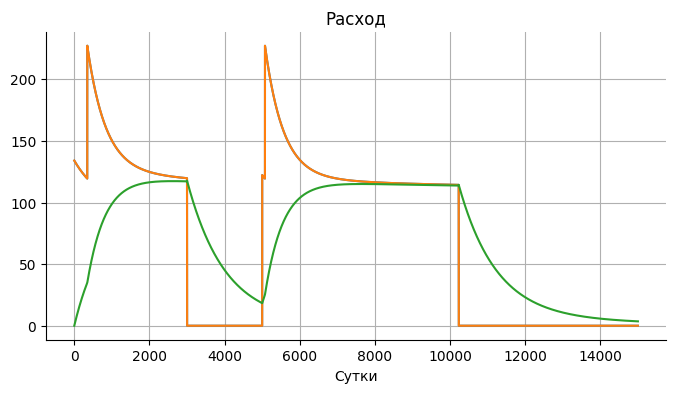

In [136]:
df = pd.DataFrame({'q_N': _q_N, 'p_3': _p_3, 'p_1': _p_1, 'q': __q, 'h_4': _h_4, 'u': _u})

from matplotlib import pyplot as plt
df['q_N'].plot(kind='line', figsize=(8, 4), title='q_N', grid=True)
plt.gca().spines[['top', 'right']].set_visible(False)

x = np.linspace(0, 3,5, 3499)

# plot one by one
plt.plot(df['q_N'])
plt.plot(df['q'])


# set x label
plt.xlabel('Сутки')

# set title
plt.title('Расход')

# display plot
plt.show()

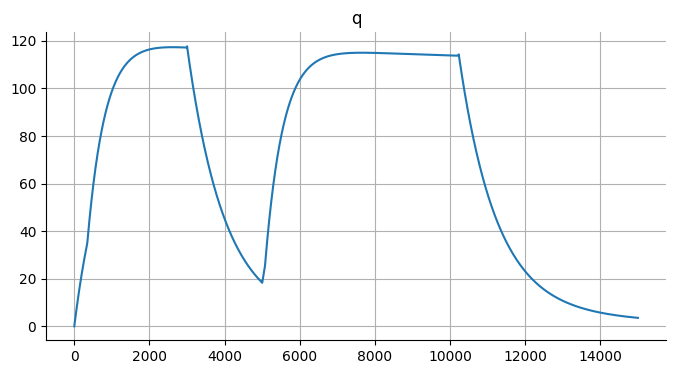

In [124]:
from matplotlib import pyplot as plt
df['q'].plot(kind='line', figsize=(8, 4), title='q', grid=True)
plt.gca().spines[['top', 'right']].set_visible(False)

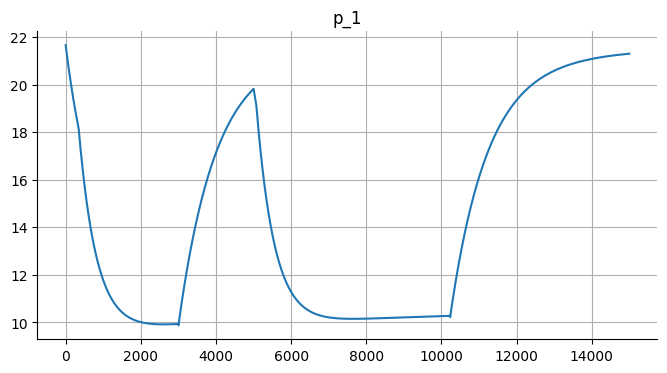

In [127]:
from matplotlib import pyplot as plt
df['p_1'].plot(kind='line', figsize=(8, 4), title='p_1', grid=True)
plt.gca().spines[['top', 'right']].set_visible(False)

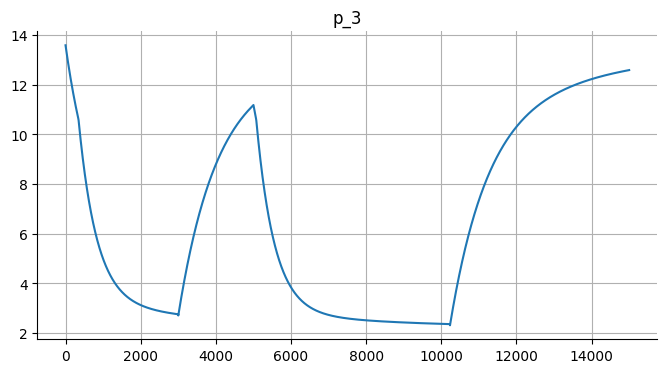

In [128]:
from matplotlib import pyplot as plt
df['p_3'].plot(kind='line', figsize=(8, 4), title='p_3', grid=True)
plt.gca().spines[['top', 'right']].set_visible(False)

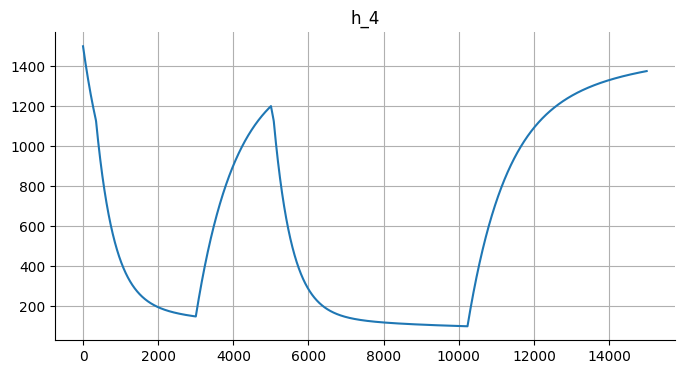

In [129]:
from matplotlib import pyplot as plt
df['h_4'].plot(kind='line', figsize=(8, 4), title='h_4', grid=True)
plt.gca().spines[['top', 'right']].set_visible(False)

In [134]:
df.iloc[10200]

,10200
q_N,114.341070
p_3,2.361911
p_1,10.271699
q,113.783006
h_4,101.168469


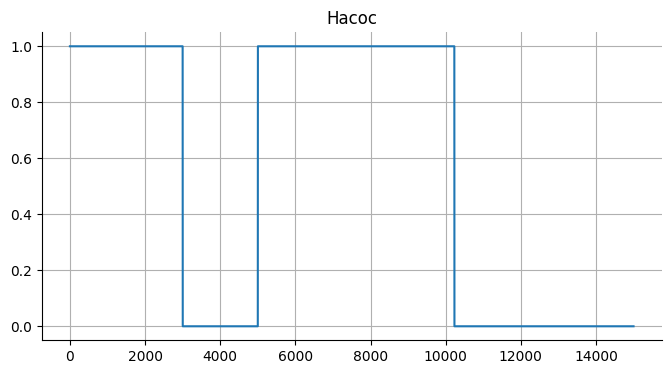

In [137]:
from matplotlib import pyplot as plt
df['u'].plot(kind='line', figsize=(8, 4), title='Насос', grid=True)
plt.gca().spines[['top', 'right']].set_visible(False)